In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

IMAGE_SIZE = 150

base_dir = "image_data"

train_dir = os.path.join(base_dir, "train_suits")
val_dir   = os.path.join(base_dir, "val_suits")
test_dir  = os.path.join(base_dir, "test_suits")


train_ds = image_dataset_from_directory(train_dir,
                                               batch_size = 20,
                                               image_size = (IMAGE_SIZE, IMAGE_SIZE))

val_ds = image_dataset_from_directory(val_dir,
                                      batch_size = 20,
                                      image_size = (IMAGE_SIZE, IMAGE_SIZE)) 



Found 926 files belonging to 4 classes.
Found 28 files belonging to 4 classes.


In [2]:
train_ds.class_names

['clubs', 'diamonds', 'hearts', 'spades']

Get a batch and try to see the output from the datagen

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

#check_images, y = next(train_generator)

#print(check_images[0].shape)

#for i, image in enumerate(check_images):
##    plt.imshow(image)
#    plt.text(0, 0, y[i])
#    plt.show()

In [4]:
from tensorflow.keras import layers, Model
import tensorflow as tf

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.2),
  layers.RandomTranslation(0.2, 0.2),
  layers.RandomZoom(0.2, 0.2)
])

In [5]:
## try using VGG16 + imagenet
conv_base = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
# input
inputs = layers.Input(shape=(150, 150, 3))

# data scaling and augmentation
x = resize_and_rescale(inputs)
x = data_augmentation(x)

x = conv_base(x)

# Finally add our inference layers
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(4, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,124 (64.14 MB)

 Trainable params: 2,098,436 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
from tensorflow import keras

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 881ms/step - accuracy: 0.3162 - loss: 2.1469 - val_accuracy: 0.2857 - val_loss: 1.3297
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 567ms/step - accuracy: 0.5166 - loss: 1.0760 - val_accuracy: 0.3214 - val_loss: 1.2924
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 768ms/step - accuracy: 0.6356 - loss: 0.8841 - val_accuracy: 0.4643 - val_loss: 1.2917
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 540ms/step - accuracy: 0.6318 - loss: 0.8393 - val_accuracy: 0.5000 - val_loss: 1.3072
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6255 - loss: 0.8472 - val_accuracy: 0.3571 - val_loss: 1.3673
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 539ms/step - accuracy: 0.6613 - loss: 0.8181 - val_accuracy: 0.3214 - val_loss: 1.3337
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.6782 - loss: 0.7643 - val_accuracy: 0.4643 - val_loss: 1.2346
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 611ms/step - accuracy: 0.6747 - loss: 0.7047 - val_accurac

Text(0.5, 1.0, 'Training and validation loss')

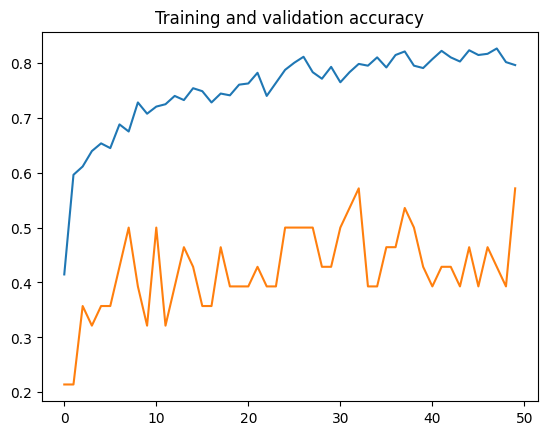

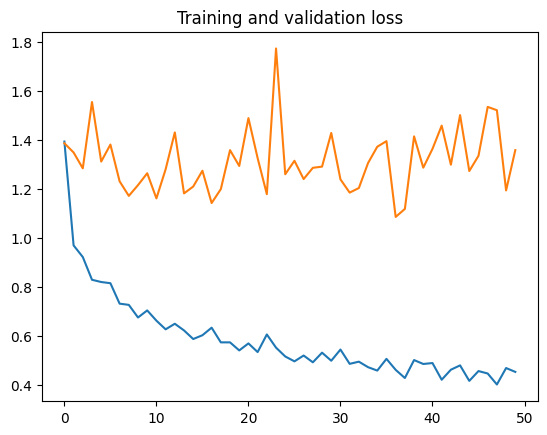

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=1e-5)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

for layer in conv_base.layers:
    if layer.trainable == True: print(layer)

<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=40,
  callbacks=callbacks
)

Epoch 1/100


/Users/harryhudson/Devel/cards/.venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 626ms/step - accuracy: 0.8268 - loss: 0.3832 - val_accuracy: 0.5000 - val_loss: 1.6355
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 651ms/step - accuracy: 0.8554 - loss: 0.3573 - val_accuracy: 0.5357 - val_loss: 1.1422
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 744ms/step - accuracy: 0.8643 - loss: 0.3323 - val_accuracy: 0.6071 - val_loss: 1.0597
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 634ms/step - accuracy: 0.8848 - loss: 0.3133 - val_accuracy: 0.5000 - val_loss: 1.6932
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 677ms/step - accuracy: 0.8644 - loss: 0.3249 - val_accuracy: 0.5000 - val_loss: 1.7958
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 643ms/step - accuracy: 0.8624 - loss: 0.3170 - val_accuracy: 0.5357 - val_loss: 1.2388
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 641ms/step - accuracy: 0.8771 - loss: 0.3260 - val_accuracy: 0.6429 - val_loss: 1.1731
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 643ms/step - accuracy: 0.8736 - loss: 0.3019 - val_accuracy

In [10]:
test_ds = image_dataset_from_directory(test_dir,
                                      image_size = (IMAGE_SIZE, IMAGE_SIZE)) 

predictions = model.predict(test_ds)

Found 34 files belonging to 4 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


2024-06-04 13:00:07.427082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


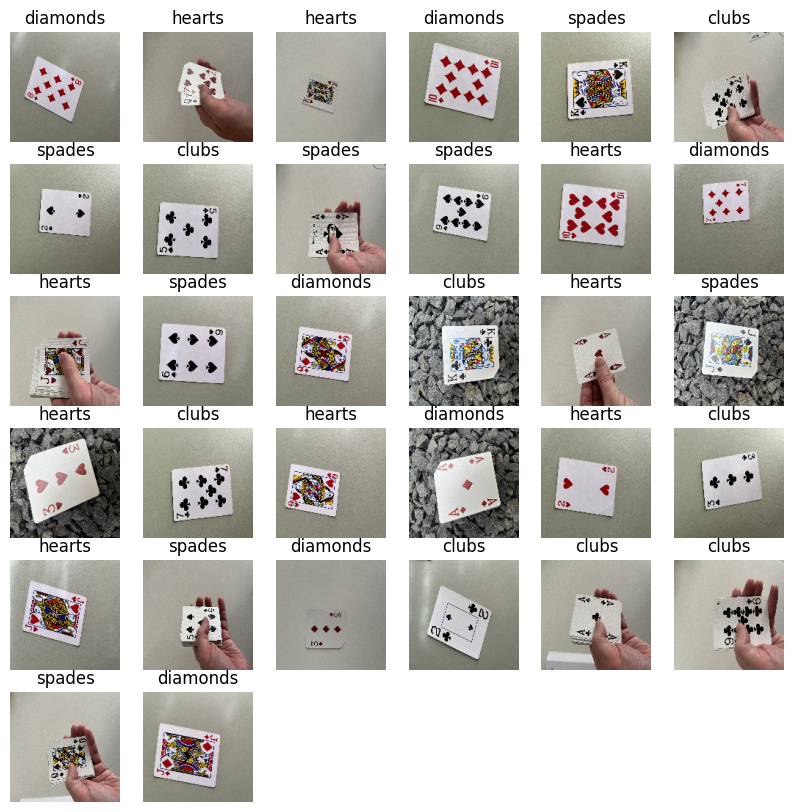

In [20]:
import numpy as np

plt.figure(figsize=(10, 10))

class_names = test_ds.class_names
for images, labels in test_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")